In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
features_df = pd.read_csv("extracted_features_v0.2.csv", index_col="wav_id")

In [4]:
labels_df_01 = pd.read_csv("4th.csv", encoding='cp949').set_index("wav_id")
labels_df_02 = pd.read_csv("5th_1st.csv", encoding='cp949').set_index("wav_id")
labels_df_03 = pd.read_csv("5th_2nd.csv", encoding='cp949').set_index("wav_id")
labels_df = pd.concat([labels_df_01, labels_df_02, labels_df_03])

In [61]:
EMOTIONS = ["happiness", "angry", "disgust", "fear", "neutral", "sadness", "surprise"]
SCORES = [emo+"_score" for emo in EMOTIONS]
def score_emotion(row):
    valued_emotions = {emo: None for emo in EMOTIONS}
    
    for i in range(1, 6):
        emo_label = row.get(f'{i}번 감정').lower()
        emo_val = row.get(f'{i}번 감정세기', row.get(f'{i}번감정세기'))
        if valued_emotions[emo_label] is None: valued_emotions[emo_label] = 0
        valued_emotions[emo_label] += emo_val / 10
    
    for emo, val in valued_emotions.items():
        if emo.lower() == 'neutral': continue
        valued_emotions[emo] = None if val == 0 else val

    return [valued_emotions[emo] for emo in EMOTIONS]

labels_df[SCORES] = labels_df.apply(lambda row: pd.Series(score_emotion(row)), axis=1)

    

In [62]:
meta_columns = [
    "발화문", "상황", "1번 감정", "1번 감정세기", "2번 감정", "2번 감정세기",
    "3번 감정", "3번 감정세기", "4번 감정", "4번 감정세기", "5번 감정", "5번 감정세기",
    "나이", "성별"
]

labels_df[["happiness_score", "angry_score", "disgust_score", "fear_score",
    "neutral_score", "sadness_score", "surprise_score"]]

,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,
5e258fd1305bcf3ad153a6a4,NaN,0.2,NaN,NaN,0.0,NaN,NaN
5e258fe2305bcf3ad153a6a5,NaN,0.2,NaN,NaN,0.0,NaN,NaN
5e258ff5305bcf3ad153a6a6,NaN,0.4,NaN,NaN,0.0,NaN,NaN
5e25902f305bcf3ad153a6a9,NaN,NaN,NaN,NaN,NaN,0.5,NaN
5e27f90b5807b852d9e0157b,NaN,NaN,NaN,NaN,NaN,0.6,NaN
...,...,...,...,...,...,...,...
5fbe313c44697678c497c05a,0.1,NaN,NaN,NaN,NaN,0.5,NaN
5fbe251044697678c497bfb8,NaN,NaN,NaN,0.1,0.0,0.4,NaN
5fbe31584c55eb78bd7cee7f,NaN,NaN,NaN,0.1,0.0,0.4,NaN


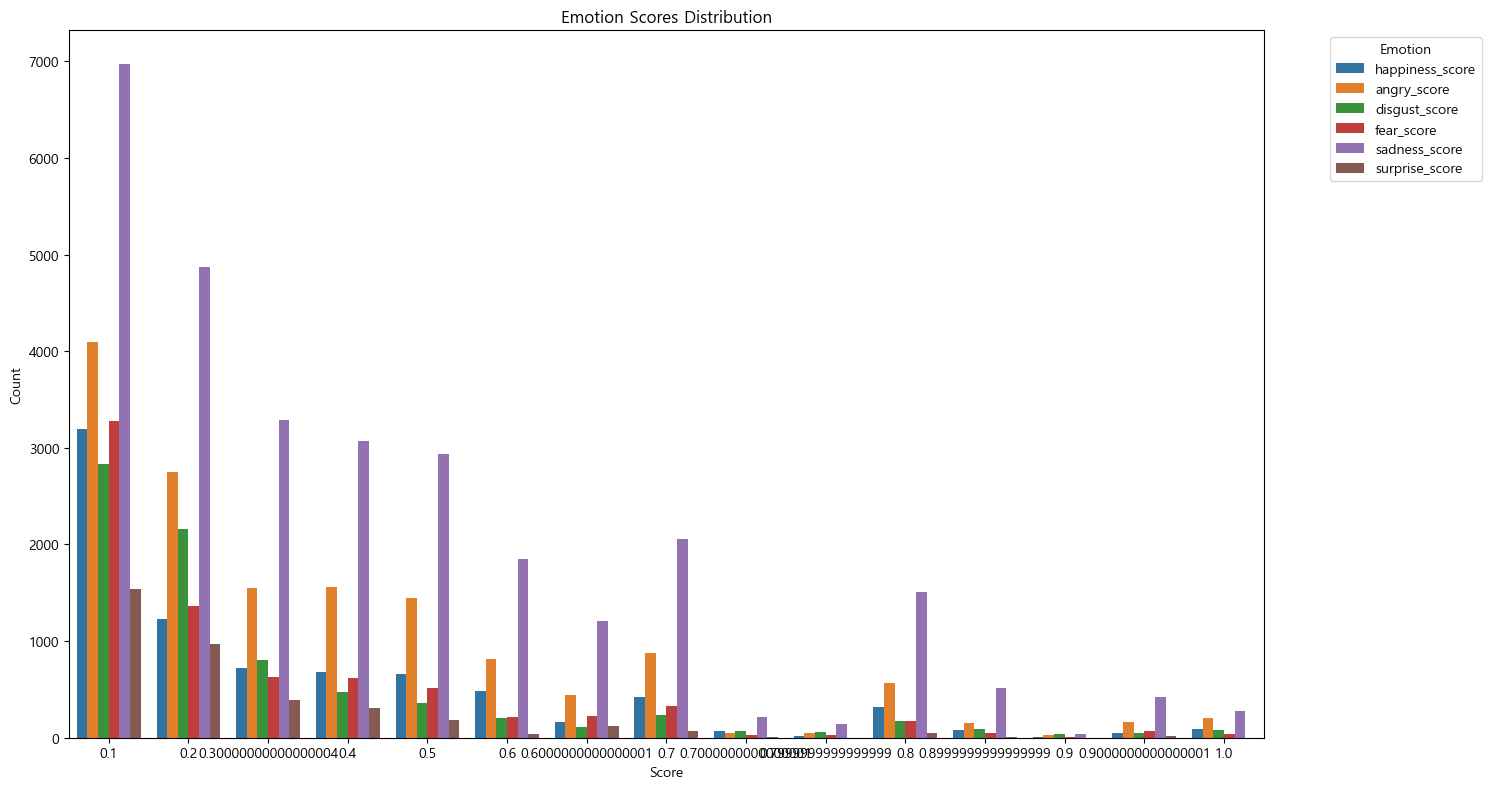

In [ ]:
happiness_counts_df = labels_df['happiness_score'].value_counts()
angry_counts_df = labels_df['angry_score'].value_counts()
disgust_counts_df = labels_df['disgust_score'].value_counts()
fear_counts_df = labels_df['fear_score'].value_counts()
neutral_counts_df = labels_df['neutral_score'].value_counts()
sadness_counts_df = labels_df['sadness_score'].value_counts()
surprise_counts_df = labels_df['surprise_score'].value_counts()
from matplotlib import pyplot as plt
import seaborn as sns

emotion_columns = ['happiness_score', 'angry_score', 'disgust_score', 'fear_score',  'sadness_score', 'surprise_score']

# 긴 형태로 변환
melted = labels_df[emotion_columns].melt(var_name='emotion', value_name='score')
                                                                                     
# 감정별 score 분포 시각화
plt.figure(figsize=(15, 8))
sns.countplot(data=melted, x='score', hue='emotion')
plt.title('Emotion Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [53]:
import pandas as pd

emotion_counts = {}
for emotion in SCORES:
    count = (labels_df[emotion]).count()
    emotion_counts[emotion] = count

count_df = pd.DataFrame(list(emotion_counts.items()), columns=['항목', '개수'])
count_df

,항목,개수
0,happiness_score,8158
1,angry_score,14741
2,disgust_score,7740
3,fear_score,7562
4,neutral_score,19452
5,sadness_score,29367
6,surprise_score,3691


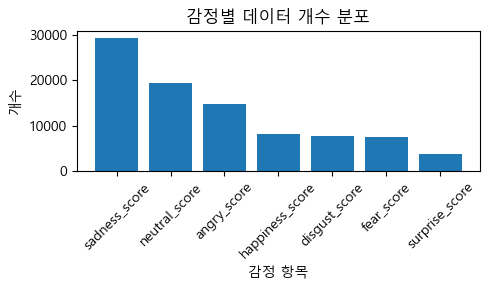

In [44]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# 개수 많은 순으로 정렬
count_df_sorted = count_df.sort_values(by='개수', ascending=False)

# 시각화
plt.figure(figsize=(5, 3))
plt.bar(count_df_sorted['항목'], count_df_sorted['개수'])
plt.xlabel('감정 항목')
plt.ylabel('개수')
plt.title('감정별 데이터 개수 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
data = features_df.join(labels_df, how='inner')

emotion_cols = [col for col in SCORES]

X = data.drop(columns=emotion_cols+meta_columns)
y = data[emotion_cols]

y.head()

,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,
5e258fd1305bcf3ad153a6a4,NaN,0.2,NaN,NaN,0.0,NaN,NaN
5e258fe2305bcf3ad153a6a5,NaN,0.2,NaN,NaN,0.0,NaN,NaN
5e258ff5305bcf3ad153a6a6,NaN,0.4,NaN,NaN,0.0,NaN,NaN
5e25902f305bcf3ad153a6a9,NaN,NaN,NaN,NaN,NaN,0.5,NaN
5e27ec9f5807b852d9e01542,NaN,NaN,NaN,NaN,0.0,0.5,NaN


In [8]:
def clean_columns(col):
    return col.replace('[', '_').replace(']', '').replace('<', '_')

X.columns = [clean_columns(col) for col in X.columns]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_test


,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
5e339cd55807b852d9e04f9a,1.594477e-05,0.0,1.594477e-05,143.0,0.0,2.266393e-06,-2.565675e-09,2.877024e-06,2.102258e-06,7.553680e-12,...,34.814774,6.043323,5.951327,52.205480,-0.516968,0.0,0.854327,0.516968,0.854327,1.371295
5f92d1349e04b149046cdd71,2.501883e-08,0.0,2.501883e-08,217.0,0.0,1.571350e-09,1.924820e-12,1.060310e-09,2.170174e-09,1.347600e-17,...,28.315815,5.389816,1.581788,11.415789,-0.722664,0.0,1.246900,0.722664,1.246900,1.969564
5ecf20eb9aa8ea0eec53f000,1.208197e-06,0.0,1.208197e-06,265.0,0.0,9.834151e-08,-1.071556e-10,1.368640e-07,1.215100e-07,3.232513e-14,...,20.966793,4.639727,3.425036,24.202490,-0.289026,0.0,0.910404,0.289026,0.910404,1.199430
5f677d6fd338b948c4e682b2,6.056801e-06,0.0,6.056801e-06,150.0,0.0,1.807177e-07,-2.130164e-10,2.400428e-07,2.655135e-07,3.983940e-13,...,34.824440,6.000742,5.733852,51.292725,-0.288479,0.0,0.076866,0.288479,0.076866,0.365345
5f5d617d2e23c7161accd093,4.308003e-05,0.0,4.308003e-05,259.0,0.0,2.229806e-06,3.664830e-09,1.350247e-06,3.126906e-06,2.727298e-11,...,43.457134,6.594004,4.773418,41.052900,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5f644904d0b14d419059b84b,4.073609e-08,0.0,4.073609e-08,289.0,0.0,1.029087e-09,-1.333080e-12,1.982906e-09,1.361136e-09,8.462587e-18,...,49.253640,7.025598,1.191023,13.811883,-2.139863,0.0,3.147976,2.139863,3.147976,5.287839
5f65422d111dfd48d40fc9e0,4.527131e-08,0.0,4.527131e-08,219.0,0.0,1.305872e-09,4.506618e-13,1.156477e-09,1.650735e-09,1.171234e-17,...,39.886406,6.339852,2.300739,18.941689,-1.522499,0.0,1.985691,1.522499,1.985691,3.508191
5f0fd0e8b140144dfcff4a43,2.571592e-08,0.0,2.571592e-08,949.0,0.0,1.392913e-09,2.000073e-12,3.458744e-10,1.676184e-09,7.908000e-18,...,48.315120,6.966429,2.447020,29.271559,-2.282095,0.0,2.206733,2.282095,2.206733,4.488828


In [ ]:
from sklearn.metrics import r2_score

models = {}
for emo in y.columns:
    # 학습할 수 있는 행만 추출 (NaN 제거)
    train_mask = ~y_train[emo].isna()
    test_mask = ~y_test[emo].isna()

    # 모델 정의
    model = XGBRegressor(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        n_jobs=-1
    )

    # 모델 학습
    model.fit(X_train[train_mask],   y_train[emo][train_mask])

    # 예측
    y_pred = model.predict(X_test[test_mask])

    # 평가
    mse = mean_squared_error(y_test[emo][test_mask], y_pred)
    print(f"{emo:<20} MSE: {mse:.4f}")

    models[emo] = model

    r2 = r2_score(y_test[emo][test_mask], y_pred)
    print(f"📈 {emo} R²: {r2:.4f}")



happiness_score      MSE: 0.0383
📈 happiness_score R²: 0.3656
angry_score          MSE: 0.0472
📈 angry_score R²: 0.2060
disgust_score        MSE: 0.0414
📈 disgust_score R²: 0.1988
fear_score           MSE: 0.0383
📈 fear_score R²: 0.2432
neutral_score        MSE: 0.0000
📈 neutral_score R²: 1.0000
sadness_score        MSE: 0.0445
📈 sadness_score R²: 0.2780
surprise_score       MSE: 0.0217
📈 surprise_score R²: 0.2697


In [11]:
# 감정별 예측값 DataFrame
pred_df = pd.DataFrame({emo: models[emo].predict(X_test) for emo in y.columns}, index=X_test.index)

# 실제 값과 비교
comparison = pd.concat([y_test, pred_df], axis=1, keys=["Actual", "Predicted"])

# 예시 출력
pd.set_option('display.max_columns', None)
print(comparison.head())


                                  Actual                                       \
                         happiness_score angry_score disgust_score fear_score   
wav_id                                                                          
5e339cd55807b852d9e04f9a             NaN         0.6           NaN        NaN   
5f92d1349e04b149046cdd71             0.6         NaN           NaN        NaN   
5ecf20eb9aa8ea0eec53f000             NaN         NaN           NaN        NaN   
5f677d6fd338b948c4e682b2             0.4         NaN           NaN        NaN   
5f5d617d2e23c7161accd093             NaN         0.5           NaN        NaN   

                                                                     \
                         neutral_score sadness_score surprise_score   
wav_id                                                                
5e339cd55807b852d9e04f9a           0.0           NaN            NaN   
5f92d1349e04b149046cdd71           NaN           NaN            NaN

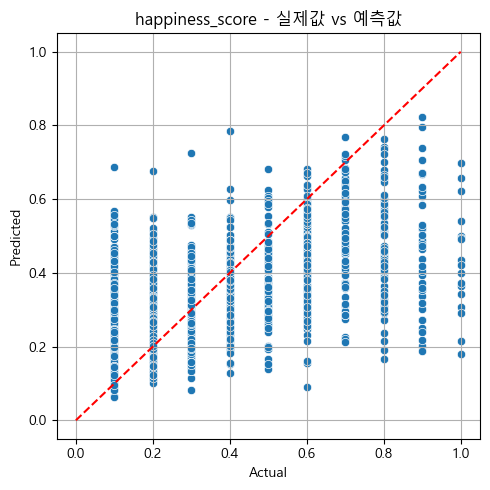

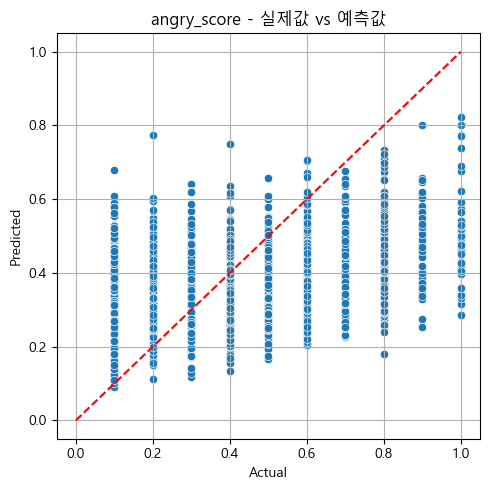

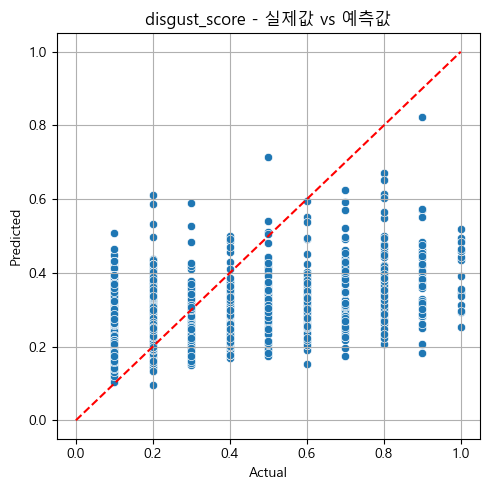

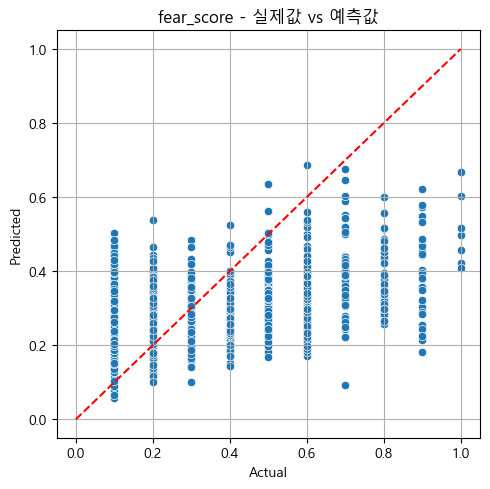

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14384\729442389.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


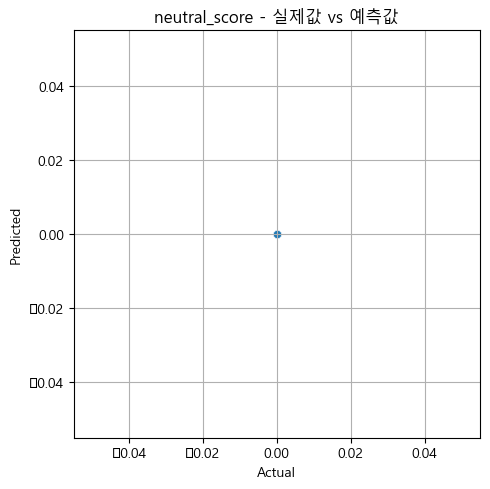

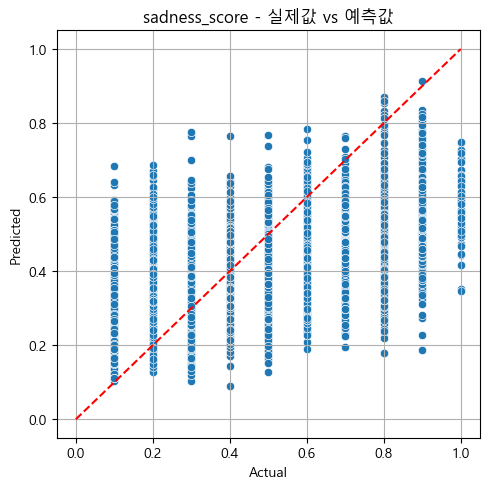

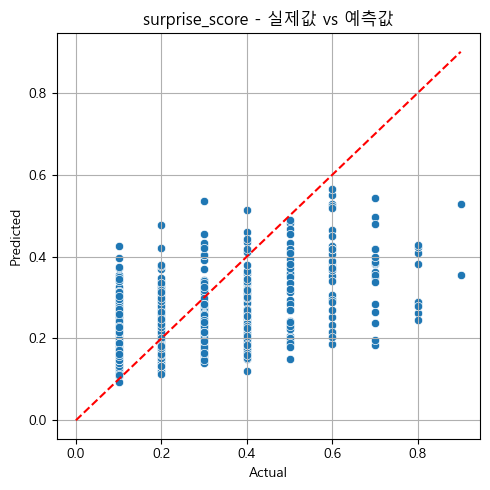

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
for emo in y.columns:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=y_test[emo], y=pred_df[emo])
    plt.plot([0, y_test[emo].max()], [0, y_test[emo].max()], '--r')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{emo} - 실제값 vs 예측값")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [13]:
for emo in y.columns:
    print(f"{emo:<20} NaNs: {y[emo].isna().sum()} | 0s: {(y[emo] == 0).sum()} | Mean: {y[emo].mean():.3f}")


happiness_score      NaNs: 35817 | 0s: 0 | Mean: 0.316
angry_score          NaNs: 29238 | 0s: 0 | Mean: 0.351
disgust_score        NaNs: 36235 | 0s: 0 | Mean: 0.278
fear_score           NaNs: 36413 | 0s: 0 | Mean: 0.280
neutral_score        NaNs: 24532 | 0s: 19443 | Mean: 0.000
sadness_score        NaNs: 14622 | 0s: 0 | Mean: 0.383
surprise_score       NaNs: 40285 | 0s: 0 | Mean: 0.240


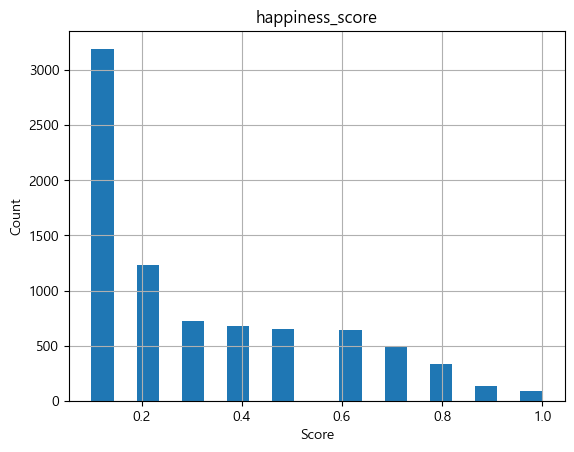

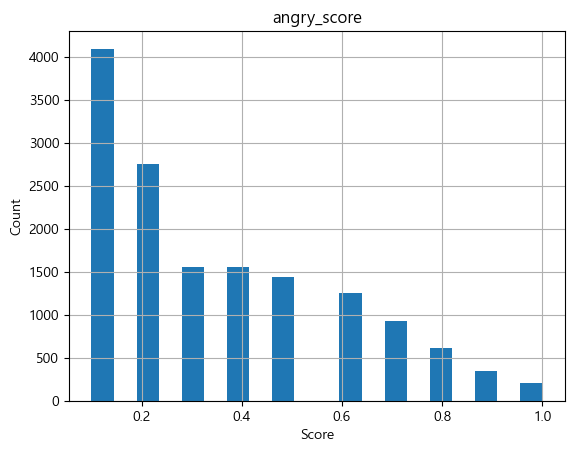

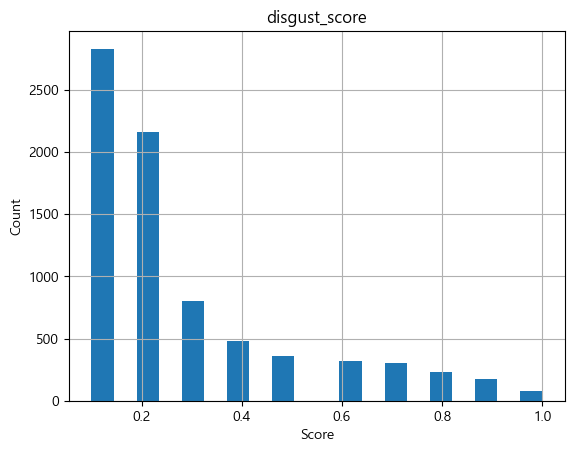

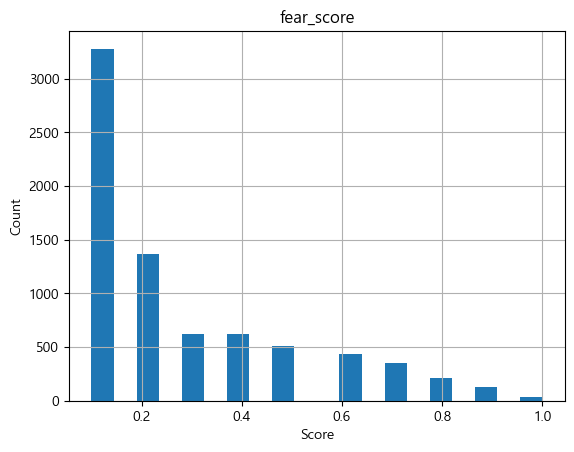

c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


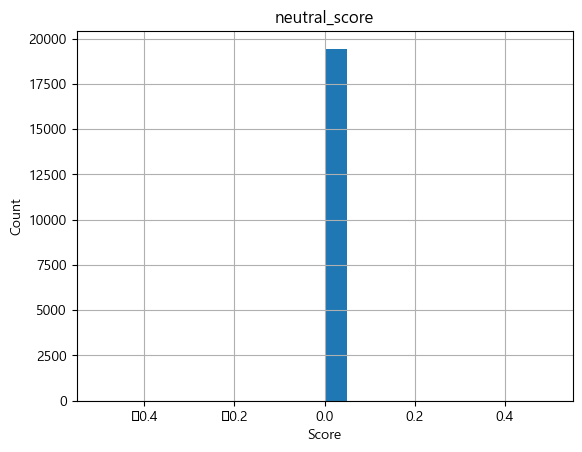

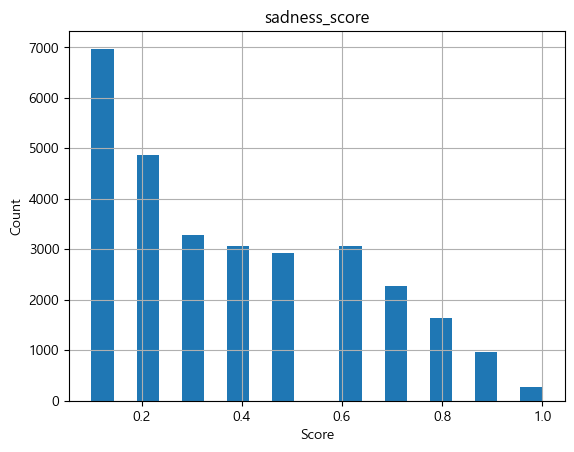

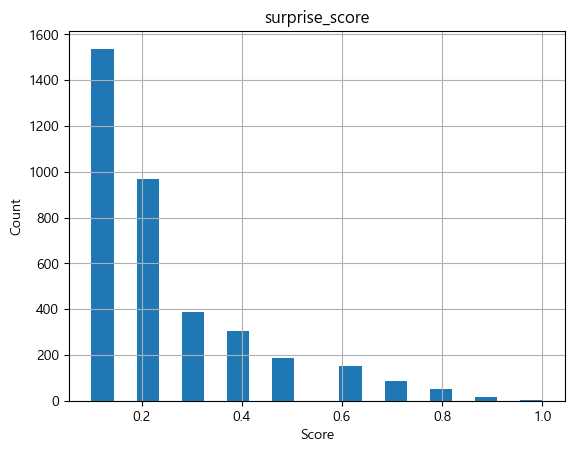

In [14]:
for emo in y.columns:
    y[emo].hist(bins=20)
    plt.title(emo)
    plt.xlabel("Score")
    plt.ylabel("Count")
    plt.show()
